In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('household_power_consumption.txt', delimiter=';')

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
power_consumption = data.iloc[ : , 2:].dropna()

#pc_toarray = np.array(power_consumption)
pc_toarray = power_consumption.values

train_set, test_set = train_test_split(pc_toarray, test_size=0.1)

In [5]:
train_set.shape, test_set.shape

((1844352, 7), (204928, 7))

In [6]:
%pylab inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [7]:
pc = PCA(n_components=2)
train = pc.fit_transform(train_set)

k_means = KMeans()
k_means.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
train.shape

(1844352, 2)

In [9]:
pc.explained_variance_ratio_

array([0.49420276, 0.23668461])

In [10]:
x_min, x_max = train[:, 0].min()-5, train[:, 0].max()-1
y_min, y_max = train[:, 1].min(), train[:, 1].max()+5

print(x_min, x_max)
print(y_min, y_max)

-14.30508629695192 49.52916160794892
-11.481347833404206 83.21032507205692


In [11]:
a = np.arange(x_min, x_max, .02)
b = np.arange(y_min, y_max, .02)

xx, yy = np.meshgrid(a,b)

In [12]:
xx.shape,yy.shape, a.shape, b.shape

((4735, 3192), (4735, 3192), (3192,), (4735,))

In [13]:
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [14]:
k_means.cluster_centers_.shape

(8, 2)

In [15]:
k_means.inertia_

8350794.286626078

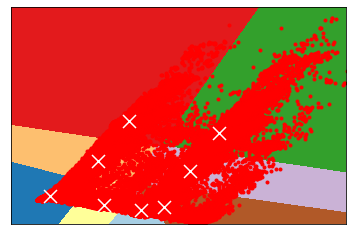

In [16]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(train[:, 0], train[:, 1],"or", markersize=3)
centroids = k_means.cluster_centers_
#inert = k_means.inertia_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Distances

## C-Dist

Computes the distance between m points using Euclidean distance (2-norm) as the distance metric between the points. The points are arranged as m  
n-dimensional row vectors in the matrix X.

## P-Dist

Computes the distance between m points using Euclidean distance (2-norm) as the distance metric between the points. The points are arranged as m n-dimensional row vectors in the matrix X.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

tss = sum(pdist(train)**2)/train.shape[0]

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = []
for k in k_range:
    k_means_var.append(KMeans(n_clusters=k).fit(train))
#print(k_means_var.shape)


# Pull out the cluster centers for each model
centroids = []
for X in k_means_var:
    centroids.append(X.cluster_centers_)
#print(centroids.shape)

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid=[]
for cent in centroids:
    k_euclid.append(cdist(train, cent, 'euclidean'))
#print(k_euclid.shape)

dist=[]
for ke in k_euclid:
    dist.append(np.min(ke,axis=1))

# Total within-cluster sum of squares
wcss=[]
for d in dist:
    wcss.append(sum(d**2))

# The total sum of squares
tss = sum(pdist(train)**2)/train.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

In [ ]:
# run 8/random, 7/kmeans++ for silhouette
k_means = KMeans(n_clusters=7)
k_means.fit(hpc)

x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min() + 1, hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Silhoutte Score

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
from sklearn.metrics import silhouette_score

labels = k_means.labels_
silhouette_score(hpc, labels, metric='euclidean')